In [1]:
import pandas as pd
import numpy as np
import cv2    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

from keras import optimizers
from keras.applications.inception_v3 import preprocess_input
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import np_utils
#from keras.optimizers import SGD
#from keras.optimizers import Adam

from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

from IPython.core.display import display, HTML
from PIL import Image
from io import BytesIO
import base64

plt.style.use('ggplot')
%matplotlib inline

celeba-dataset



In [2]:
main_folder = '../input/celeba-dataset/'
images_folder = main_folder + 'img_align_celeba/img_align_celeba/'

EXAMPLE_PIC = images_folder + '000506.jpg'

TRAINING_SAMPLES = 10000
VALIDATION_SAMPLES = 2000
TEST_SAMPLES = 2000
IMG_WIDTH = 178
IMG_HEIGHT = 218
BATCH_SIZE = 16
NUM_EPOCHS = 3

In [3]:
df_attr = pd.read_csv(main_folder + 'list_attr_celeba.csv')
df_attr.set_index('image_id', inplace=True)
df_attr.replace(to_replace=-1, value=0, inplace=True) #replace -1 by 0
df_attr.shape

(202599, 40)

In [4]:
df_attr.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,
000001.jpg,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
000002.jpg,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
000003.jpg,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
000004.jpg,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
000005.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


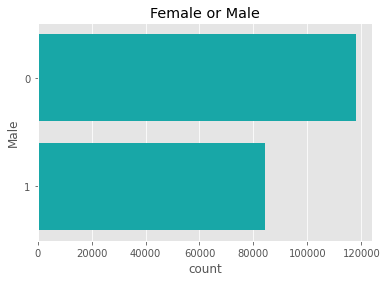

In [5]:
# Female or Male?
plt.title('Female or Male')
sns.countplot(y='Male', data=df_attr, color="c")
plt.show()

In [6]:
# Recomended partition
df_partition = pd.read_csv(main_folder + 'list_eval_partition.csv')
df_partition.head()

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


In [7]:
df_partition['partition'].value_counts().sort_index()

0    162770
1     19867
2     19962
Name: partition, dtype: int64

In [8]:
df_partition.set_index('image_id', inplace=True)
df_par_attr = df_partition.join(df_attr['Male'], how='inner')
df_par_attr.head()

,partition,Male
image_id,,
000001.jpg,0,0
000002.jpg,0,0
000003.jpg,0,1
000004.jpg,0,0
000005.jpg,0,0


In [9]:
df_train = df_par_attr[(df_par_attr['partition'] == 0) 
                           & (df_par_attr["Male"] == 0)].sample(int(TRAINING_SAMPLES/2))

In [10]:
df_train = pd.concat([df_train,
                      df_par_attr[(df_par_attr['partition'] == 0) 
                                  & (df_par_attr["Male"] == 1)].sample(int(TRAINING_SAMPLES/2))])

In [11]:
df_train

,partition,Male
image_id,,
045366.jpg,0,0
109084.jpg,0,0
060325.jpg,0,0
015225.jpg,0,0
083440.jpg,0,0
...,...,...
084027.jpg,0,1
121098.jpg,0,1
051505.jpg,0,1


# Loading Images and converting into array and gray scale

In [12]:
def load_reshape_img(fname):
    img = load_img(fname)
    x = img_to_array(img)/255.
    x = x.reshape((1,) + x.shape)
    #x = [color.rgb2gray(i) for i in x]
    return x

In [13]:
x_train = np.array([load_reshape_img(images_folder + fname) for fname in df_train.index])


In [14]:
x_train = x_train.reshape(x_train.shape[0], 218, 178, 3)

In [15]:
x_train = [ color.rgb2gray(i) for i in x_train]

# Loading labels

In [16]:
import numpy as np
y_train = np.array(df_train["Male"])

In [17]:
y_train

array([0, 0, 0, ..., 1, 1, 1])

In [18]:
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [19]:
df_validate = df_par_attr[(df_par_attr['partition'] == 1) 
                           & (df_par_attr["Male"] == 0)].sample(int(VALIDATION_SAMPLES/2))

In [20]:
x_validate = x_validate.reshape(x_validate.shape[0], 218, 178, 3)

NameError: name 'x_validate' is not defined

In [ ]:
y_validate = np.array(df_evaluate["Male"])

# HOG features extraction

In [ ]:
ppc = 16
hog_images = []
hog_features = []
for image in x_train:
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

In [ ]:
plt.imshow(hog_images[51])

In [ ]:
clf = svm.SVC()
hog_features = np.array(hog_features)
data_frame = np.hstack((hog_features,y_train))
np.random.shuffle(data_frame)

In [ ]:
percentage = 80
partition = int(len(hog_features)*percentage/100)

In [ ]:
x_train_data, x_test_data = data_frame[:partition,:-1],  data_frame[partition:,:-1]
y_train_data, y_test_data = data_frame[:partition,-1:].ravel() , data_frame[partition:,-1:].ravel()

clf.fit(x_train_data,y_train_data)

In [ ]:
y_pred = clf.predict(x_test_data)

In [ ]:
print("Accuracy: "+str(accuracy_score(y_test_data, y_pred)))
print('\n')
print(classification_report(y_test_data, y_pred))